# Demo: some steps of our work

#### Preliminary cell to start the notebook

In [262]:
# libraries
import os
import sys
import platform
print(sys.version)

strong_pc = platform.system() == 'Linux'
in_colab = 'google.colab' in sys.modules
if in_colab:
    if not os.getcwd().split('/')[-1].split('_')[-1]=='2023':
        from google.colab import drive
        drive.mount('/content/drive')
        os.chdir(r'/content/drive/MyDrive/Human_Data_Analytics_Project_2023')

    #!pip install tensorflow==2.11.0
    #!pip install tensorflow_text==2.11.0
    if not 'tensorflow_io' in sys.modules:
        print('Installing tensorflow-IO')
        !pip install tensorflow-io
    if not 'keras' in sys.modules and False:
        print('Installing keras')
        !pip install keras==2.11.0
    if not 'scikeras' in sys.modules:
        print('Installing scikeras')
        !pip install scikeras[tensorflow]
    if not 'keras-tuner' in sys.modules:
        print('installing keras tuner')
        !pip install keras-tuner
        !pip install numba==0.57.0


if 'DEEPNOTE_ENV' in os.environ:
    os.chdir('/..')
    os.chdir('datasets')
    os.chdir('googledrivedeepnoteintegration')
    os.chdir('Human_Data_Analytics_Project_2023')
    if not 'librosa' in sys.modules:
        print('Installing Librosa')
        !pip install librosa
    if not 'scikeras' in sys.modules:
        print('Installing scikeras')
        !pip install scikeras[tensorflow]
    if not 'keras-tuner' in sys.modules:
        print('installing keras tuner')
        !pip install keras-tuner
        !pip install numba==0.57.0

main_dir = os.getcwd()
if main_dir not in sys.path:
    print('Adding the folder for the modules')
    sys.path.append(main_dir)

#BASE LIBRARIES
import numpy as np
import pandas as pd
import h5py
import shutil
import time
import random
import subprocess
import itertools
import warnings
import pickle
import json

#PLOT LIBRARIES
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
#import plotly.express as px

#AUDIO LIBRARIES
import librosa
from scipy.io import wavfile
from scipy import signal
from scipy.fft import fft,ifft,fftfreq, fftshift
from scipy.signal import stft,spectrogram,periodogram
#from pydub import AudioSegment

#MACHINE LEARNING LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, LeaveOneOut, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils import check_random_state
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.models import load_model

# GPU SETTINGS FOR LINUX and repressing warnings for windows. References for gpu: https://www.tensorflow.org/guide/gpu
show_gpu_activity = False
if sys.platform == 'linux' and not in_colab:
    if show_gpu_activity:
        tf.debugging.set_log_device_placement(True)

    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
    # Restrict TensorFlow to only allocate a part of memory on the first GPU
        try:
            tf.config.set_logical_device_configuration(
                gpus[0],
                [tf.config.LogicalDeviceConfiguration(memory_limit=6800)])
            logical_gpus = tf.config.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Virtual devices must be set before GPUs have been initialized
            print(e)
else:
    warnings.filterwarnings("ignore", category=UserWarning)

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model as tf_plot
if in_colab:
    import tensorflow_io as tfio
print("TensorFlow version:", tf.__version__)
# show keras version
import keras
print(f'keras version = {keras.__version__}')
#import keras_tune as kt
from keras import layers
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.regularizers import L1L2
# kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4) # we may use this in some layers...

#RANDOM SETTINGS
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
check_random_state(seed)

#EVALUATION LIBRAIRES
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve
from sklearn.metrics import make_scorer
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import precision_recall_fscore_support, auc

#OUR PERSONAL FUNCTIONS
import importlib
from Preprocessing.data_loader import download_dataset,load_metadata
from Preprocessing.exploration_plots import one_random_audio, plot_clip_overview, Spectral_Analysis
from Models.basic_ml import basic_ML_experiments, basic_ML_experiments_gridsearch, build_dataset, extract_flatten_MFCC
from Visualization.model_plot import confusion_matrix,listen_to_wrong_audio

importlib.reload(importlib.import_module('Preprocessing.data_loader'))
importlib.reload(importlib.import_module('Models.basic_ml'))
importlib.reload(importlib.import_module('Visualization.model_plot'))

from Preprocessing.data_loader import load_metadata
df_ESC10, df_ESC50 = load_metadata(main_dir,heads = False, ESC_US = False, statistics=False)

from Preprocessing.data_loader import load_metadata
from Models.basic_ml import basic_ML_experiments, basic_ML_experiments_gridsearch, build_dataset, extract_flatten_MFCC

importlib.reload(importlib.import_module('Models.ann_utils'))
importlib.reload(importlib.import_module('Visualization.model_plot'))

from Models.ann_utils import *
from Models.ann_utils import MFCCWithDeltaLayer,OutputCutterLayer
from Visualization.model_plot import plot_history, confusion_matrix, listen_to_wrong_audio, visualize_the_weights

ESC10_path = os.path.join(main_dir,'Data', 'ESC-10-depth')
samplerate = 44100

import importlib
importlib.reload(importlib.import_module('Preprocessing.exploration_plots'))


3.11.4 (main, Jul  5 2023, 08:54:11) [Clang 14.0.6 ]
TensorFlow version: 2.12.0
keras version = 2.12.0


<module 'Preprocessing.exploration_plots' from '/Users/leonardo/Desktop/HDA/Human_Data_Analytics_Project_2023/Preprocessing/exploration_plots.py'>

## Listening to an audio from ESC-50 and plotting its waveform 

The sample rate is 44100
The data shape is (220500,)
Audio category: cow


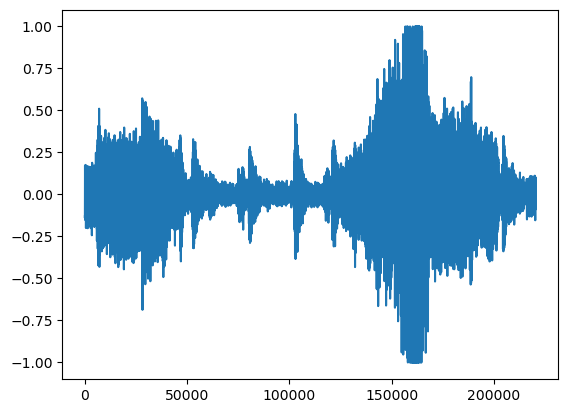

In [263]:
from Preprocessing.exploration_plots import one_random_audio
audio, samplerate = one_random_audio(main_dir, end= 220500)

Preprocessing the audio into STFT spectrogram

In [264]:
sample_rate = 44100
segment = 20
overlapping = 10
n_fft = 20
nperseg = round(sample_rate * segment / 1000)
noverlap = round(sample_rate * overlapping / 1000)
n_fft = round(sample_rate * n_fft / 1000)
hop_length = nperseg - noverlap

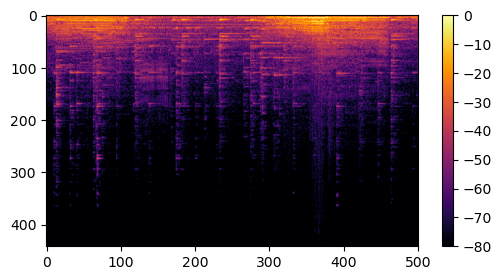

In [265]:
# Preprocess the audio into STFT spectrogram with librosa
audio = audio.astype(np.float32)
spectrogram = librosa.stft(audio, n_fft = n_fft, hop_length=hop_length)
spectrogram = np.abs(spectrogram)
spectrogram = librosa.amplitude_to_db(spectrogram, ref=np.max)

#plot the spectrogram
plt.figure(figsize=(6, 3))
plt.imshow(spectrogram.astype(np.float32), aspect='auto', cmap='inferno')
plt.colorbar()
plt.show()


## The best model in action

In [266]:
# Load the model
model_name = 'ESC50_simple_CNN_STFT_Augmented'
model = load_model(os.path.join(main_dir,'Saved_Models',model_name))

In [219]:
ESC50_path = os.path.join(main_dir,'data', 'ESC-50-depth')
batch_size = 30
preprocessing = 'STFT'

train, val, test, label_names, INPUT_DIM, n_labels = create_dataset(ESC50_path,
                                                verbose = 0,
                                                batch_size = batch_size,
                                                validation_split = 0.25, # this is the splitting of train vs validation + test
                                                normalize = True, # normalization preprocessing (default is true)
                                                preprocessing = preprocessing,   # "STFT", "MEL", "MFCC" or None
                                                show_example_batch = True,
                                                ndim=3)

Found 2000 files belonging to 50 classes.
Using 1500 files for training.
Using 500 files for validation.


2023-09-12 17:32:56.000563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1500]
	 [[{{node Placeholder/_0}}]]
2023-09-12 17:32:56.000730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1500]
	 [[{{node Placeholder/_4}}]]
2023-09-12 17:33:02.817483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_21' with dtype float
	 [[{{node Place

1/1 [==============================] - 0s 114ms/step


2023-09-12 17:40:20.971927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_19' with dtype float
	 [[{{node Placeholder/_19}}]]
2023-09-12 17:40:20.972366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [500]
	 [[{{node Placeholder/_4}}]]


Plot of the spectrogram


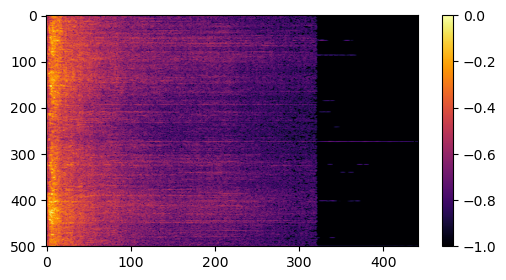

first element of the batch predicted class: sea_waves
first element of the batch true class: sea_waves


In [248]:
for i,j in test.shuffle(1000).take(1):
    #print(i.shape,j.shape)
    predicted_batch = model.predict(i)
    predicted_batch = tf.argmax(predicted_batch, axis=1).numpy()
    first_element_predicted = predicted_batch[0]
    first_element_true = tf.argmax(j[0]).numpy()
    print('Plot of the spectrogram')
    plt.figure(figsize=(6, 3))
    plt.imshow(i[0].numpy().astype(np.float32), aspect='auto', cmap='inferno')
    plt.colorbar()
    plt.show()
    print('first element of the batch predicted class:',label_names[first_element_predicted])
    print('first element of the batch true class:',label_names[first_element_true])

Listen to an audio from the predicted class

In [249]:
path = df_ESC50[df_ESC50['category']==label_names[first_element_predicted]].full_path.values[0]
librosa_audio, librosa_sample_rate = librosa.load(path, sr=44100)
#listen to librosa_audio
ipd.Audio(librosa_audio, rate=librosa_sample_rate)

Listen to an audio from the true class

In [247]:
path = df_ESC50[df_ESC50['category']==label_names[first_element_true]].full_path.values[0]
librosa_audio, librosa_sample_rate = librosa.load(path, sr=44100)
#listen to librosa_audio
ipd.Audio(librosa_audio, rate=librosa_sample_rate)

### Accuracy of the best model on the test set of ESC-50

In [250]:
# check for the accuracy on the test set
test_accuracy = model.evaluate(test)[1]
print('Test accuracy:', test_accuracy)

9/9 [==============================] - 1s 80ms/step - loss: 0.7659 - accuracy: 0.8960
Test accuracy: 0.8960000276565552
